## Testing and Debugging the BPASS isochrone at 10^7.0 years age. (Non Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^7.0 years age, a tenth of solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or of 110 (state of NEWSECMODS remnant primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged.

**I will be using the Kennicutt IMF(Kennicutt 1983) and a slightly different age. I also use the MISTv.1 model as there are no non-solar-metallicity models for the other stellar evolution models.**

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
import numpy as np
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(7.0, 0.0, 1000,math.log10(1), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=4.00 for T= 35763 logg=3.88
Changing to T= 50000 for T=102134 logg=5.40
Changing to logg=5.00 for T=102134 logg=5.40
Changing to T= 50000 for T= 83086 logg=4.67
Changing to logg=5.00 for T= 83086 logg=4.67
Changing to T= 50000 for T= 73318 logg=4.84
Changing to logg=5.00 for T= 73318 logg=4.84
Changing to T= 50000 for T=101667 logg=5.41
Changing to logg=5.00 for T=101667 logg=5.41
Changing to logg=4.00 for T= 31761 logg=3.51
Changing to logg=4.00 for T= 31615 logg=3.92
Changing to T= 50000 for T= 63838 logg=4.53
Changing to logg=5.00 for T= 63838 logg=4.53
Changing to T= 50000 for T= 67724 logg=4.33
Changing to logg=5.00 for T= 67724 logg=4.33
Changing to T= 50000 for T= 72205 logg=4.44
Changing to logg=5.00 for T= 72205 logg=4.44
Changing to T= 50000 for T= 90738 logg=5.12
Changing to logg=5.00 for T= 90738 logg=5.12
Changing to T= 50000 for T= 71698 logg=4.79
Changing to logg=5.00 for T= 71698 logg=4.79
Changing to T= 50000 for T=101368 logg=5.42
Changing to logg=5.0

As a sanity check, I would like to make sure that, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (models with phase 101), and non-white dwarf compact remnants that are  NEWSECMODS primaries (models with phase 110). Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged.

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x == 110) for x in iso1.primaries['phase']])

False

In [3]:
np.all([(x == 5 or x == 101) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

4.591806913365015

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

5.898517399939001

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

5.7676806790772

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.178243141326868

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.108995846829808

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

3.96292885544605

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.194452095013302

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.075886239648769

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.239978886358815

Text(0.5, 0, 'logg in cgs')

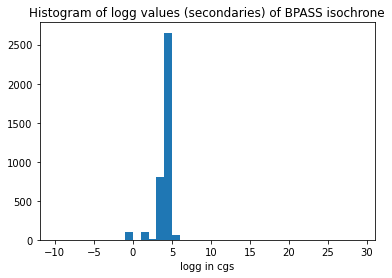

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

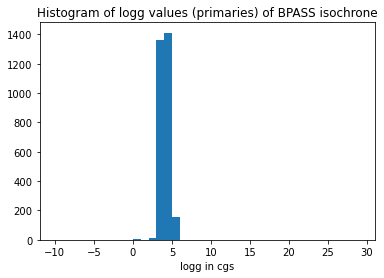

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

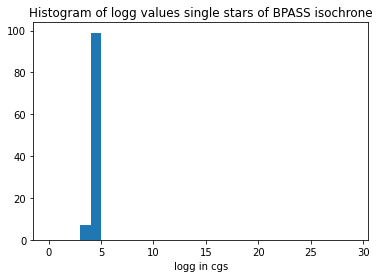

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

What exactly could be causing the vertical line? First, I want to zoom in...
Plotting the CMD for the Color magnitude diagram for high surface gravity stars. Remember to account for distance modulus for dist = 1000 pc

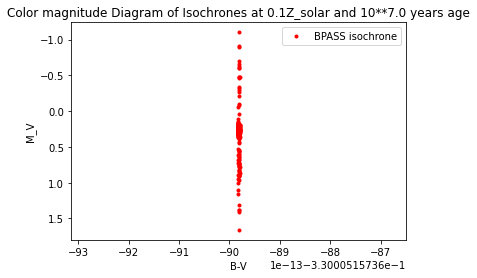

In [17]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg'] > 5)[0]
indices2= np.where(iso1.primaries['logg'] > 5)[0]
indices3= np.where(iso1.secondaries['logg'] > 5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2] - iso1.primaries["m_ubv_V"][indices2],
         iso1.primaries["m_ubv_V"][indices2] - 5 * np.log10(1000 / 10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3] - iso1.secondaries["m_ubv_V"][indices3],
         iso1.secondaries["m_ubv_V"][indices3] - 5 * np.log10(1000 / 10), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1] - iso1.singles["m_ubv_V"][indices1],
         iso1.singles["m_ubv_V"][indices1] - 5 * np.log10(1000 / 10), "r.",
         label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

In [18]:
indices2= np.where((iso1.primaries['logg'] > 5) & (iso1.primaries['m_ubv_B'] -
                                                   iso1.primaries['m_ubv_V'] > -0.4) &
                   (iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] < -0.2))[0]

In [19]:
np.unique(iso1.primaries[indices2]['phase'])

5.0


In [20]:
indices2= np.where((iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] > 1.2) &
                   (iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] < 1.5))[0]

In [21]:
indices2

array([  10,   14,   28,   36,   77,  104,  120,  124,  139,  165,  189,
        198,  205,  221,  231,  245,  247,  255,  259,  269,  286,  290,
        293,  296,  323,  333,  336,  346,  381,  406,  416,  423,  445,
        461,  470,  591,  603,  620,  623,  627,  630,  668,  705,  730,
        742,  743,  773,  777,  780,  784,  798,  830,  851,  852,  857,
        874,  885,  886,  922,  924,  942,  949,  966,  979,  996, 1001,
       1015, 1024, 1028, 1030, 1032, 1033, 1042, 1057, 1074, 1078, 1080,
       1081, 1111, 1126, 1131, 1133, 1145, 1151, 1167, 1168, 1193, 1199,
       1216, 1223, 1233, 1234, 1245, 1261, 1269, 1295, 1302, 1310, 1336,
       1341, 1343, 1360, 1364, 1373, 1374, 1384, 1402, 1416, 1427, 1436,
       1444, 1483, 1515, 1527, 1556, 1573, 1575, 1594, 1597, 1598, 1608,
       1610, 1626, 1627, 1638, 1665, 1682, 1686, 1688, 1700, 1704, 1743,
       1763, 1768, 1782, 1784, 1816, 1823, 1833, 1864, 1877, 1913, 1919,
       1922, 1948, 1950, 1957, 1965, 1969, 1977, 19

In [22]:
np.unique(iso1.primaries['phase'][indices2])

5.0


In [23]:
iso1.primaries[indices2]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,29.73434412175074,26.844111696772348,28.27650950798301,25.459569321584837,22.116508460327807
2.51189,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.838442056327263,False,2.514053,5.0,4,29.533744095873796,26.82832086123655,28.206730505704147,25.433390047382133,22.10384727887856
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,29.73434412175074,26.844111696772348,28.27650950798301,25.459569321584837,22.116508460327807
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,29.73434412175074,26.844111696772348,28.27650950798301,25.459569321584837,22.116508460327807
1.99526,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.738067123420117,False,1.99526,5.0,4,29.36331274150405,26.81264021665257,28.1406883326787,25.40763724059908,22.091238492026473
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,29.73434412175074,26.844111696772348,28.27650950798301,25.459569321584837,22.116508460327807
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,29.73434412175074,26.844111696772348,28.27650950798301,25.459569321584837,22.116508460327807
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938455886504599,False,3.165106,5.0,4,29.735202403962603,26.844173636520164,28.276790181457127,25.45967250610618,22.11655805200404


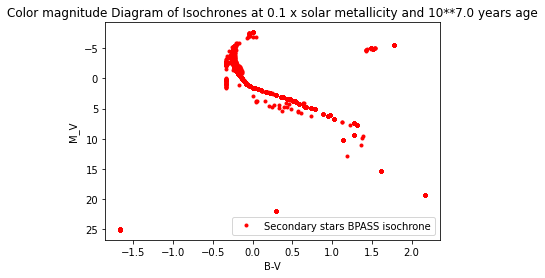

In [24]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100), "r.",
         label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1 x solar metallicity and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

Hmm, I think those are stars that are going to be white dwarves very soon or may unintentionally be brown dwarves. At least according to HOKI's criterion for what is a white dwarf or not. At the very least, at least the stars we just saw were low mass stars so they should be **LOW** on the CMD

In [25]:
iso2=synthetic.IsochronePhot(7.0, 0.0, 1000, math.log10(1 / 10), recomp=True) # New Parsec isochrone for same metallicity

Changing to logg=4.00 for T= 31270 logg=4.00
Changing to logg=4.00 for T= 31267 logg=3.99
Changing to logg=4.00 for T= 31259 logg=3.98
Changing to logg=4.00 for T= 31245 logg=3.97
Changing to logg=4.00 for T= 31226 logg=3.96
Changing to logg=4.00 for T= 31200 logg=3.94
Changing to logg=4.00 for T= 31169 logg=3.93
Changing to logg=4.00 for T= 31139 logg=3.92
Changing to logg=4.00 for T= 31109 logg=3.91
Changing to logg=4.00 for T= 31072 logg=3.90
Changing to logg=4.00 for T= 31032 logg=3.89
Changing to logg=4.00 for T= 31013 logg=3.64
Changing to logg=4.00 for T= 31102 logg=3.64
Changing to logg=4.00 for T= 31185 logg=3.64
Changing to logg=4.00 for T= 31263 logg=3.65
Changing to logg=4.00 for T= 31337 logg=3.65
Changing to logg=4.00 for T= 31405 logg=3.65
Changing to logg=4.00 for T= 31467 logg=3.65
Changing to logg=4.00 for T= 31520 logg=3.65
Changing to logg=4.00 for T= 31564 logg=3.66
Changing to logg=4.00 for T= 31593 logg=3.66
Changing to logg=4.00 for T= 31604 logg=3.66
Changing t

Looking at the distribution of logg values. for the stars in the Parsec isochrone.

In [26]:
np.max(iso2.points['logg'])

4.583447298562488

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  72.,
         42.,  93., 208., 247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29]),
 <BarContainer object of 39 artists>)

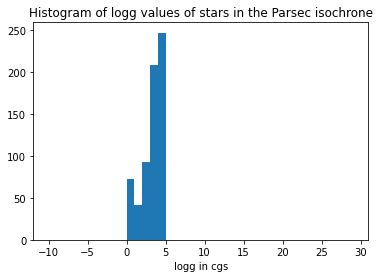

In [27]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))

In [28]:
np.median(iso2.points['logg'])

3.556386609995295

In [29]:
np.mean(iso2.points['logg'])

3.2602644297347076

In [30]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the Parsec isochrone

In [31]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                20000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                 20000, ifmr=ifmr.IFMR_Spera15())

AttributeError: module 'spisea.synthetic' has no attribute 'Binary_Cluster'

Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the M type

In [ ]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B'] - iso2.points["m_ubv_V"],
         iso2.points["m_ubv_V"] - 5 * np.log10(100), "b+", label="Parsec isochrone", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the Parsec isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

In [ ]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100), "r+",  label="BPASS isochrone", alpha=0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5*np.log10(100), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

Where are some of the goofy outliers coming from?

In [ ]:
iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"] - 5*np.log10(100) > 20.0)[0]]

In [ ]:
issue = iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"] - 5*np.log10(100) > 20.0)[0]]

In [ ]:
np.unique(issue['mass'])

In [ ]:
np.unique(issue['phase'])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.",
         label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+",
         label="Paresc", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

In [ ]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"] / cs.L_sun),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"] / cs.L_sun),
         "b+", label="Parsec", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.
First I take a look at the shape of the primary stars' plot for log current mass log L.

In [ ]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun),
         "r.", label="BPASS isochrone (primaries)")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.legend()

Which type of secondary star is it that is causing this strange pattern?

In [ ]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"] / cs.L_sun) > -3.30) &
                                   (np.log10(iso1.primaries["L"] / cs.L_sun) < -3.10))[0]]

In [ ]:
bad_line

What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [ ]:
np.unique(bad_line['L'])

In [ ]:
np.unique(bad_line['Teff'])

In [ ]:
np.unique(bad_line['logg'])

In [ ]:
np.unique(bad_line['mass'])

In [ ]:
np.unique(bad_line['phase'])

**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

In [ ]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]),
         "r.", label="Binary_Cluster made from BPASS", alpha =0.3)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]),
         "r.", label="Binary_Cluster made from BPASS", alpha = 0.3)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]),
         "b.", label="Cluster made from Parsec", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]),
         "b.", label="Cluster made from Parsec", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

In [ ]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.",
         label="Binary_Cluster made from BPASS (Star Systems)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

In [ ]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.",
         label="Binary_Cluster made from BPASS (Companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Now go back to the shape of the clusters' Color magnitude diagrams.

In [ ]:
np.unique(clus_1.companions['log_a'])

In [ ]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(100), "r.", label="BPASS", alpha =0.3)
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(100), "b+", label="Parsec", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

In [ ]:
clus_1.star_systems[np.where(clus_1.star_systems["m_ubv_V"]==0)]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]),
         "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]),
         "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]),
         "r.",label="BPASS isochrone", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]),
         "b+", label="Parsec", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_xaxis()
plt.legend()

If I look at the HR Diagram, I do see deviation with respects to the Parsec line for some of the brighter stars, but I see an overall good trend with the main-sequence turnoff. Also, I see the compact remnants where they should be given my setup.

Looking at which stars are the white dwarves?

In [ ]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

Black Holes?

In [ ]:
np.where(clus_1.star_systems['phase']==103.0)[0]

In [ ]:
np.where(clus_1.star_systems['phase']==102.0)[0]

Total mass of the cluster?

In [ ]:
clus_1.star_systems['systemMass'].sum()